In this notebook, we will work on the dataset of Vinamilk's stock price from 2013 to current. This notebook is used to build a model to predict the price using simplified linear regression.

First of all, we need to read the data and explore the structure of our dataset.

### Read the dataset

In [30]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates #used for dates, in a different way
import matplotlib.ticker as ticker #used for changing tick spacing

In [84]:
data = pd.read_csv("price_VNM.csv")
data.head()

,DATE,CLOSE,TICKER,OPEN,HIGH,LOW,VOLUME
0,06/09/2018,122.1,VNM,125.5,126.4,122.0,1234110.0
1,05/09/2018,125.5,VNM,130.0,130.0,125.2,1250390.0
2,04/09/2018,156.7,VNM,157.8,157.8,156.6,690780.0
3,31/08/2018,156.7,VNM,157.0,158.8,156.7,726110.0
4,30/08/2018,156.5,VNM,157.6,157.7,155.5,899040.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 7 columns):
DATE      1413 non-null object
CLOSE     1413 non-null float64
TICKER    1413 non-null object
OPEN      1413 non-null float64
HIGH      1413 non-null float64
LOW       1413 non-null float64
VOLUME    1413 non-null float64
dtypes: float64(5), object(2)
memory usage: 77.3+ KB


In [5]:
data.describe()

,CLOSE,OPEN,HIGH,LOW,VOLUME
count,1413.000000,1413.000000,1413.000000,1413.000000,1.413000e+03
mean,136.644515,136.592215,137.918471,135.375230,5.668907e+05
std,26.686600,26.681474,26.954576,26.395692,6.273835e+05
min,86.500000,86.000000,87.500000,86.000000,2.762000e+04
25%,117.000000,117.000000,118.000000,116.000000,1.611900e+05
50%,137.000000,137.000000,138.000000,136.000000,3.870900e+05
75%,148.000000,148.000000,148.500000,147.200000,7.583000e+05
max,214.800000,214.500000,215.000000,213.100000,9.270450e+06


In [6]:
data['TICKER'].unique()

array(['VNM'], dtype=object)

As we can see, the **TICKET** column has only one value so we can be sure all the dataset belongs only to Vinamilk. If not, we have to clean up the data before analyzing it.

Next, we have to make sure that the data for each row is not missing so we will go through the whole dataset to see whether we are missing some data or not.

In [10]:
nullData = data.isnull().sum()
nullData

DATE      0
CLOSE     0
TICKER    0
OPEN      0
HIGH      0
LOW       0
VOLUME    0
dtype: int64

All the columns return 0 so we can see that we can pass this step and we do not need to worry about the missing data anymore.

In the dataset, we have a column called **DATE** with we need to convert into a format that python can understand

In [85]:
import datetime as dt #used for dates
data['DATE'] = data['DATE'].apply(lambda d : dt.datetime.strptime(d,'%d/%m/%Y').date())
data.head()

,DATE,CLOSE,TICKER,OPEN,HIGH,LOW,VOLUME
0,2018-09-06,122.1,VNM,125.5,126.4,122.0,1234110.0
1,2018-09-05,125.5,VNM,130.0,130.0,125.2,1250390.0
2,2018-09-04,156.7,VNM,157.8,157.8,156.6,690780.0
3,2018-08-31,156.7,VNM,157.0,158.8,156.7,726110.0
4,2018-08-30,156.5,VNM,157.6,157.7,155.5,899040.0


### Analyze the dataset

First, let's see what is the maximum and minimum value of close price for the stock from 2013 to current.

In [11]:
print "Max close price: ", data['CLOSE'].max()
print "Min close price: ", data['CLOSE'].min()

Max close price:  214.8
Min close price:  86.5


Next, let's see how the close price changes each day

In [16]:
return_data = data['CLOSE'].pct_change()
DateCol = data['DATE']
return_data = pd.concat([return_data,DateCol], axis = 1)
return_data.head(5)

,CLOSE,DATE
0,NaN,06/09/2018
1,0.027846,05/09/2018
2,0.248606,04/09/2018
3,0.000000,31/08/2018
4,-0.001276,30/08/2018


We will plot a graph to see the relation between the date and the close price.
We will set up the mathplotlib so that it can draw the data in the way that we can explore easily.

In [49]:
fig_size = plt.rcParams["figure.figsize"] #loads current figure size
print('old size:',fig_size) #prints the size
fig_size[0] = 15 #sets the X size to 15
fig_size[1] = 8 #sets the Y size to 8
plt.rcParams["figure.figsize"] = fig_size #sets this numbers to the new size
fig_size = plt.rcParams["figure.figsize"] #loads the figure size for checking
print ('new size:',fig_size) #prints the figure size

('old size:', [15.0, 8.0])
('new size:', [15.0, 8.0])


In [50]:
def set_up_plot():
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(20))

#### Close Price

Text(0.5,0,'Date')

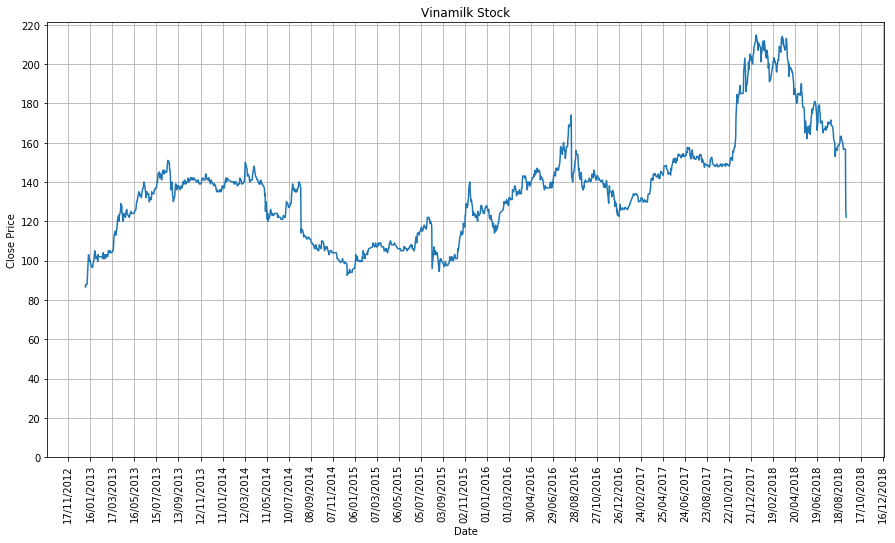

In [51]:
set_up_plot()
x = data['DATE']
y = data['CLOSE']
plt.plot(x,y)
plt.grid(True)
plt.ylim(0)
plt.xticks(rotation=90,fontsize = 10)
plt.title('Vinamilk Stock')
plt.ylabel('Close Price')
plt.xlabel('Date')

Then we will explore the whole dataset using **pairplot**

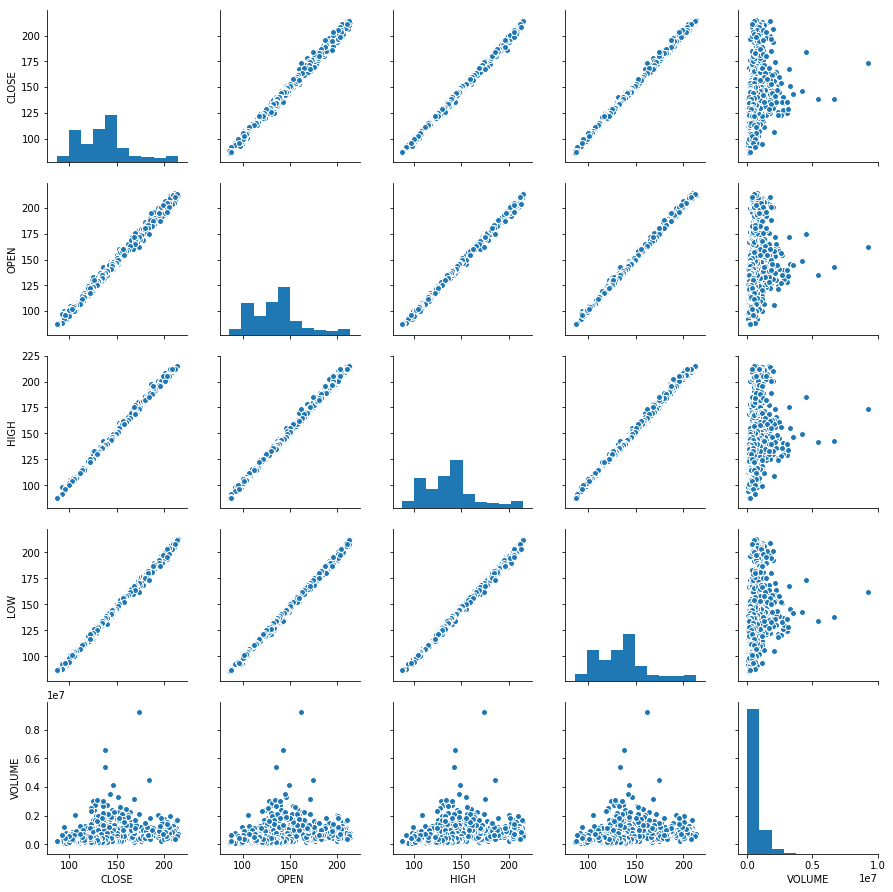

In [54]:
sb.pairplot(data)

As we can see, the most correlated featurea with **CLOSE** are **LOW** and **HIGH** and **OPEN** price. So we start with a model with 2 features **LOW**, **HIGH** and **OPEN**.

### First train and test data

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [66]:
X=data[['HIGH', 'LOW', 'OPEN']]
y=data['CLOSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_

array([ 0.7841856 ,  0.75397567, -0.53791577])

### Predict test data

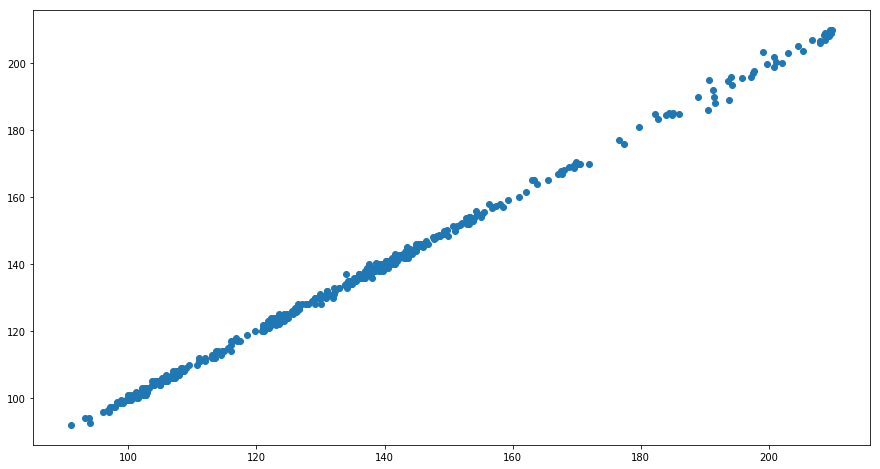

In [68]:
predictions = lm.predict(X_test)
plt.scatter(predictions, y_test)

### Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).


In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print "MAE: ",mean_absolute_error(y_test, predictions)
print "MSE: ", mean_squared_error(y_test, predictions)
print "RMSE: ", np.sqrt(mean_squared_error(y_test, predictions))


MAE:  0.6610099927742686
MSE:  0.8822959400782463
RMSE:  0.9393060949862118


After this evaluation, I would like to do something further than just use **OPEN**, **HIGH** and **LOW** prices. So I start with add one more columns into the dataset whose value is the different between current open price and the previous date's open price.

In [86]:
difference = data['OPEN'].pct_change()
data['differnce'] = difference

In [87]:
data.fillna(0, inplace=True)
data.head()

,DATE,CLOSE,TICKER,OPEN,HIGH,LOW,VOLUME,differnce
0,2018-09-06,122.1,VNM,125.5,126.4,122.0,1234110.0,0.000000
1,2018-09-05,125.5,VNM,130.0,130.0,125.2,1250390.0,0.035857
2,2018-09-04,156.7,VNM,157.8,157.8,156.6,690780.0,0.213846
3,2018-08-31,156.7,VNM,157.0,158.8,156.7,726110.0,-0.005070
4,2018-08-30,156.5,VNM,157.6,157.7,155.5,899040.0,0.003822


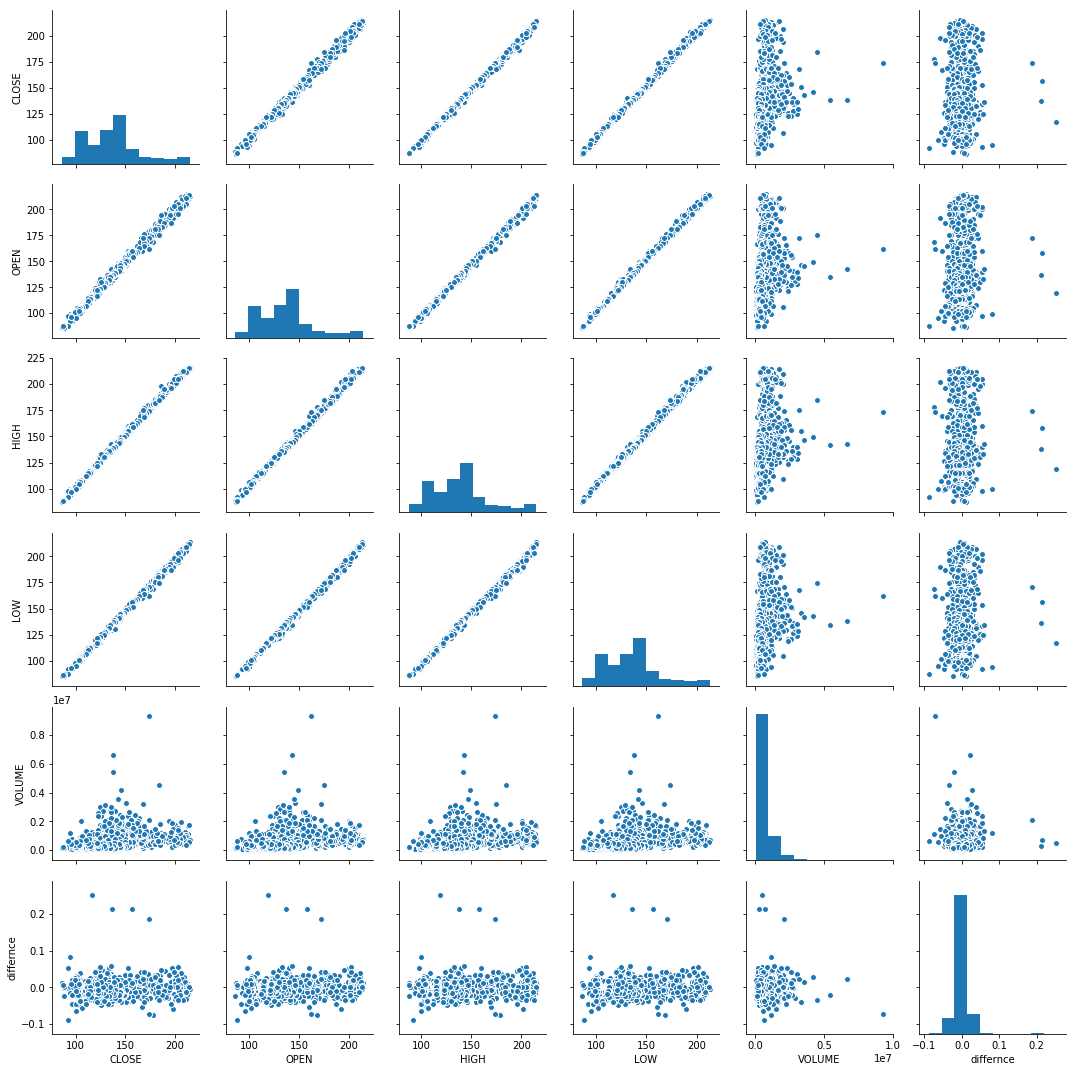

In [88]:
sb.pairplot(data)

It can be clearly seen, the difference between the **OPEN** price is not correlated to the **CLOSE** price so we won't add this feature into the model.